In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
info = pd.read_csv('Ads_CTR_Optimisation.csv')

In [7]:
N = 10000
d = 10
ads_selected = []
num_slected = [0] * d
reward_sum = [0] * d
total_reward = 0

for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if (num_slected[i] > 0):
            avg_reward = reward_sum[i] / num_slected[i]
            delta_i = math.sqrt(1.5 * math.log(n + 1) / num_slected[i])
            upper_bound = avg_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
        
    ads_selected.append(ad)
    num_slected[ad] += 1
    reward = info.values[n, ad]
    reward_sum[ad] = reward_sum[ad] + reward
    total_reward += reward

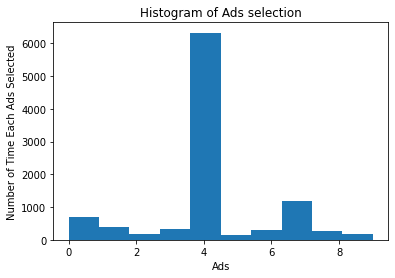

In [10]:
plt.hist(ads_selected)
plt.title('Histogram of Ads selection')
plt.xlabel('Ads')
plt.ylabel('Number of Time Each Ads Selected')
plt.show()